In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install snscrape

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 2.6 MB/s eta 0:00:00


In [4]:
!pip install emot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 2.8 MB/s eta 0:00:00


In [5]:
#libraries needed
import pandas as pd
import snscrape.modules.twitter as sntwitter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
# nltk.download('stopwords') #run once and comment it out to avoid it downloading multiple times
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

import string
import re
import textblob
from textblob import TextBlob

from wordcloud import WordCloud, STOPWORDS
from emot.emo_unicode import UNICODE_EMOJI

porter = PorterStemmer()

lemmatizer = WordNetLemmatizer() 

from wordcloud import ImageColorGenerator
from PIL import Image

import warnings
%matplotlib inline

In [28]:
import io
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS	
from collections import Counter
from PIL import Image
import numpy as np
import urllib
import requests

In [7]:
df =  pd.read_csv('/kaggle/input/tweet/Tweets.csv', delimiter=',')


In [8]:
df.head()

,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,nbr_retweet,text,url,user_id,usernameTweet
0,1160091065472487424,2019-08-10 13:00:38,NaN,False,False,NaN,1.0,0.0,0.0,# KashmirWithModi \nWith the scrapping of Art...,/Hilladventure1/status/1160091065472487424,1.154411e+18,Hilladventure1
1,1160065502200205312,2019-08-10 11:19:03,NaN,False,False,NaN,0.0,0.0,0.0,Shocking & Shameful! A must read article for...,/samwhitefyr/status/1160065502200205312,9.913207e+17,samwhitefyr
2,1161366914007875584,2019-08-14 01:30:24,NaN,True,False,NaN,0.0,0.0,0.0,"What makes "" True Islam followers"" like you co...",/rashidakhan1977/status/1161366914007875584,7.105491e+17,rashidakhan1977
3,1162074264301785088,2019-08-16 00:21:09,NaN,True,False,NaN,0.0,0.0,0.0,Just sickening to read this thread. I guess it...,/indianbyheart76/status/1162074264301785088,5.796150e+08,indianbyheart76
4,1160566972569939969,2019-08-11 20:31:43,NaN,True,False,NaN,0.0,0.0,0.0,"Don't worry Pyari Behna, whoever opposing or p...",/ShivaprakashYe2/status/1160566972569939969,1.134819e+18,ShivaprakashYe2


In [13]:
df.shape

(227259, 13)

In [12]:
df.count()

ID               227259
datetime         227259
has_media         36438
is_reply         227259
is_retweet       227259
medias            36438
nbr_favorite     227259
nbr_reply        227259
nbr_retweet      227259
text             227259
url              227258
user_id          227258
usernameTweet    227258
dtype: int64

In [9]:

df.isna().sum()

ID                    0
datetime              0
has_media        190821
is_reply              0
is_retweet            0
medias           190821
nbr_favorite          0
nbr_reply             0
nbr_retweet           0
text                  0
url                   1
user_id               1
usernameTweet         1
dtype: int64

In [17]:
df.drop('url',axis=1,inplace=True)

In [18]:
df.drop('nbr_favorite',axis=1,inplace=True)

In [19]:
df.drop('nbr_reply',axis=1,inplace=True)

In [22]:
df.drop(['medias','nbr_retweet'],axis=1,inplace=True)

In [24]:
df.drop(['ID','is_reply','has_media'],axis=1,inplace=True)

In [25]:
df.head(2)

,datetime,is_retweet,text,usernameTweet
0,2019-08-10 13:00:38,False,# KashmirWithModi \nWith the scrapping of Art...,Hilladventure1
1,2019-08-10 11:19:03,False,Shocking & Shameful! A must read article for...,samwhitefyr


In [26]:
import string
     

# remove all the punctuations from the input text.
def remove_punctuation(text):
  no_punct = "".join([c for c in text if c not in string.punctuation])
  return no_punct
     

df['text'] =df['text'].apply(lambda x: remove_punctuation(x))
     
df.tail()

,datetime,is_retweet,text,usernameTweet
227254,2019-08-07 08:22:55,False,This writeup is for those who are opposing Rem...,RahulCipher
227255,2019-08-06 08:55:42,False,Sir whats your view on article 370 and 35A,ajay_ongc
227256,2019-08-05 12:52:10,False,Madam he hasn’t given you any chance to blame ...,MrRao_RB
227257,2019-08-05 13:06:28,False,Modi is formating Indias harddisk to create pa...,Yaminmeher
227258,2019-08-08 08:07:58,False,Abrogation of provisions of Article 370 will...,DrJitendraSingh


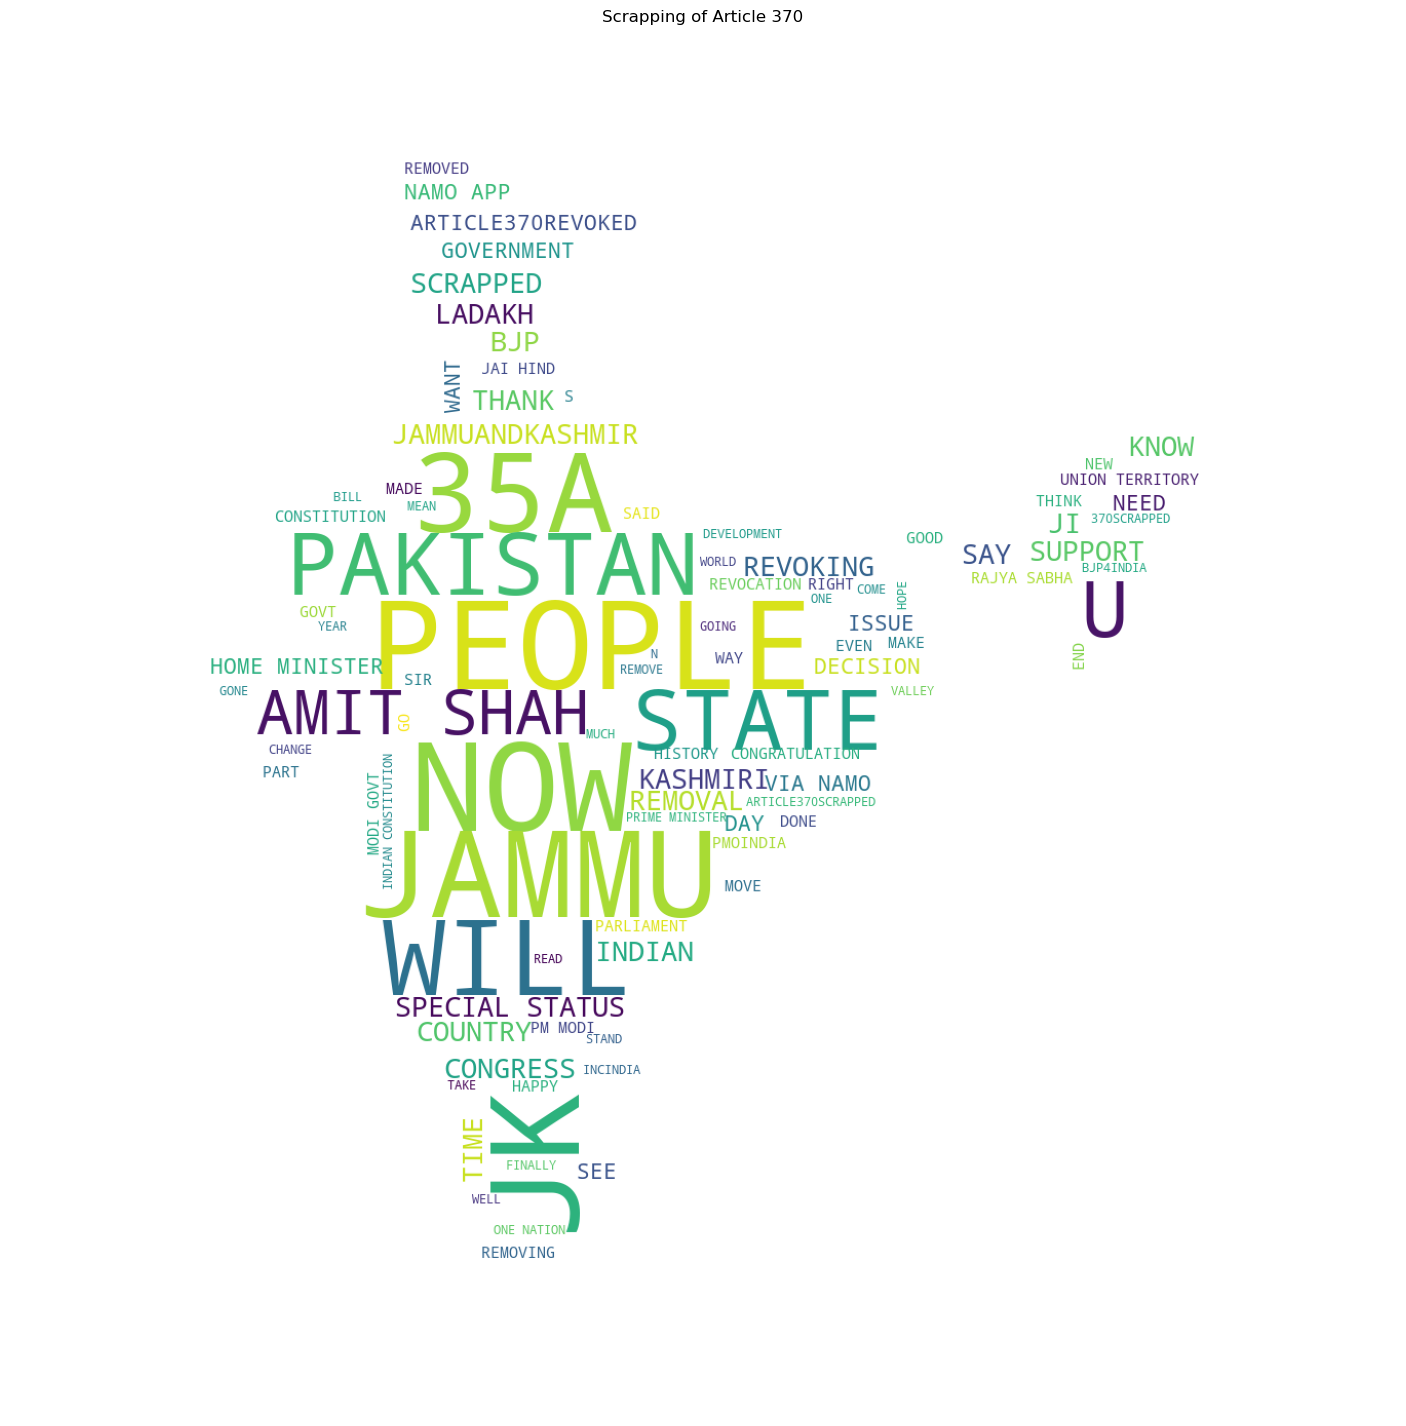

In [30]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def wordcloud_by_province(tweets):
    stopwords = set(STOPWORDS)
    stopwords.add("https")
    stopwords.add("00A0")
    stopwords.add("00BD")
    stopwords.add("00B8")
    stopwords.add("ed")
    stopwords.add("Article 370")
    stopwords.add("Article370")
    stopwords.add("article 370")
    stopwords.add("article 35A")
    stopwords.add("Article35A")
    stopwords.add("Article 35A")
    stopwords.add("Kashmir")
    stopwords.add("kashmir")
    stopwords.add("scrap")
    stopwords.add("scrapping")
    stopwords.add("revoked")
    stopwords.add("Article")
    stopwords.add("abrogation")
    stopwords.add("revoke")
    stopwords.add("Narendra Modi")
    stopwords.add("Amit Shah")
    stopwords.add("India")
    stopwords.add("NarendraModi")
    stopwords.add("AmitShah")
    stopwords.add("Amit Shah")
    stopwords.add("amit shah")
    stopwords.add("today")
    #Narendra Modi is the Prime minister of India
    mask = np.array(Image.open(requests.get("https://miro.medium.com/max/900/1*w06eGRbeB7lili3q_45T_g.png", stream=True).raw))    
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,mask=mask,max_words=200,max_font_size=40,scale=3,random_state = 2019).generate(" ".join([i for i in df['text'].str.upper()]))
    fig = plt.figure(1, figsize=(18, 18))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Scrapping of Article 370")

wordcloud_by_province(df)

In [31]:
df['hour'] = pd.DatetimeIndex(df['datetime']).hour
df['date'] = pd.DatetimeIndex(df['datetime']).date
df['minute'] = pd.DatetimeIndex(df['datetime']).minute
df['day'] = pd.DatetimeIndex(df['datetime']).day
     

In [32]:
df['text_len'] =df['text'].str.len()

In [33]:
tweet_per_hour = df.groupby(['hour'])['text'].count()
tweet_per_day = df.groupby(['day'])['text'].count()

In [34]:
df.tail()

,datetime,is_retweet,text,usernameTweet,hour,date,minute,day,text_len
227254,2019-08-07 08:22:55,False,This writeup is for those who are opposing Rem...,RahulCipher,8,2019-08-07,22,7,65
227255,2019-08-06 08:55:42,False,Sir whats your view on article 370 and 35A,ajay_ongc,8,2019-08-06,55,6,45
227256,2019-08-05 12:52:10,False,Madam he hasn’t given you any chance to blame ...,MrRao_RB,12,2019-08-05,52,5,139
227257,2019-08-05 13:06:28,False,Modi is formating Indias harddisk to create pa...,Yaminmeher,13,2019-08-05,6,5,217
227258,2019-08-08 08:07:58,False,Abrogation of provisions of Article 370 will...,DrJitendraSingh,8,2019-08-08,7,8,266


Text(0.5, 1.0, 'The number of tweets per day')

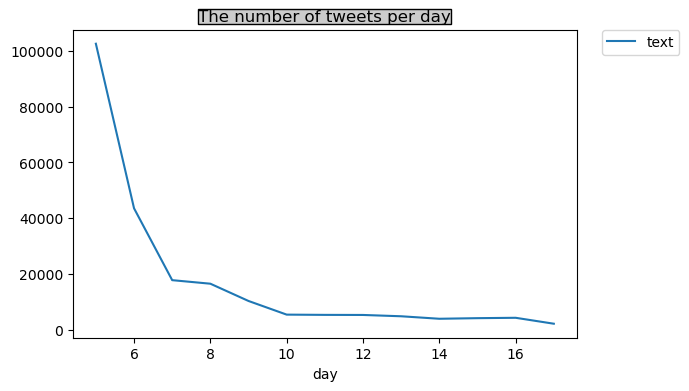

In [35]:
import seaborn as sns
tweet_per_day.transpose().plot(kind='line',figsize=(6.5, 4))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('The number of tweets per day', bbox={'facecolor':'0.8', 'pad':0})

Text(0.5, 1.0, 'The number of tweets per hour')

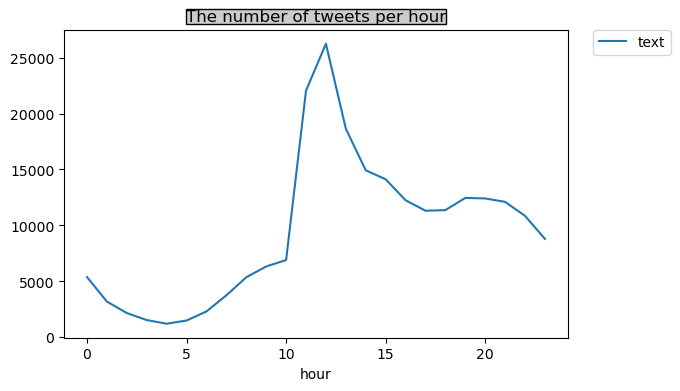

In [36]:
import seaborn as sns
tweet_per_hour.transpose().plot(kind='line',figsize=(6.5, 4))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('The number of tweets per hour', bbox={'facecolor':'0.8', 'pad':0})

In [41]:

tweets_hour = df.groupby(['hour'])['is_retweet'].sum()
tweets_minute = df.groupby(['minute'])['is_retweet'].sum()

In [42]:
tweets_avgtxt_hour = df.groupby(['hour'])['text_len'].mean()


Text(0.5, 1.0, 'The Average length of tweet by hour')

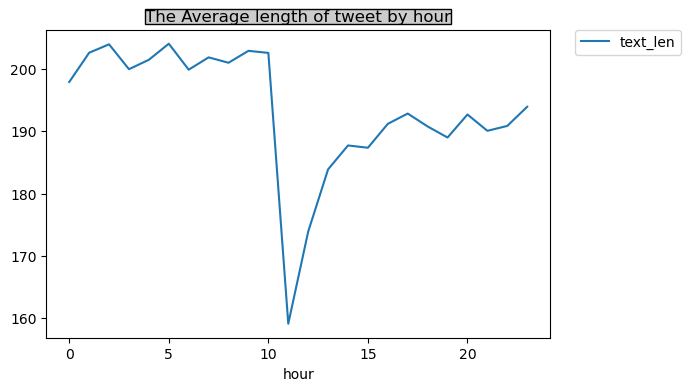

In [44]:

tweets_avgtxt_hour.transpose().plot(kind='line',figsize=(6.5, 4))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('The Average length of tweet by hour', bbox={'facecolor':'0.8', 'pad':0})

In [45]:
def get_stop_words(s, n):
  from collections import Counter
  l = get_corpus(s)
  l = remove_stopwords(l)
  l = [x for x in Counter(l).most_common(n)]
  return l

In [46]:
def remove_stopwords(text):
  import nltk
  nltk.download('stopwords')
  words = [w for w in text if w not in stopwords.words('english')]
  return words

def get_corpus(s):
  l = []
  for i in range(len(s)):
    l.extend(s[i].split())
  return l


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


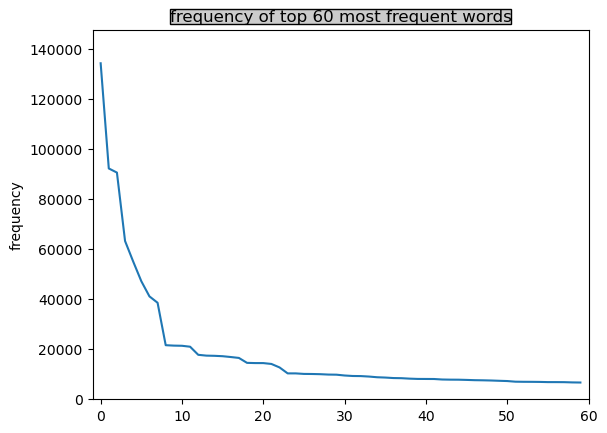

In [47]:

freqwords = get_stop_words(df['text'],60)

freq = [s[1] for s in freqwords]
w = [s[0] for s in freqwords]

plt.title('frequency of top 60 most frequent words', bbox={'facecolor':'0.8', 'pad':0})
plt.plot(freq)
plt.xlim([-1,60])
plt.ylim([0,1.1*max(freq)])
plt.ylabel('frequency')
plt.show()
     

In [49]:
print(freqwords)

[('370', 134314), ('Article', 92269), ('Article370', 90620), ('Kashmir', 63275), ('…', 55072), ('India', 47198), ('article', 41132), ('https', 38582), ('JK', 21617), ('httpswww', 21451), ('I', 21387), ('AmitShah', 21012), ('The', 17776), ('Indian', 17450), ('people', 17373), ('narendramodi', 17217), ('Jammu', 16890), ('Modi', 16529), ('JammuAndKashmir', 14558), ('35A', 14471), ('KashmirHamaraHai', 14465), ('Pakistan', 14120), ('decision', 12728), ('This', 10350), ('via', 10346), ('like', 10138), ('scrapping', 10107), ('one', 10031), ('Congress', 9877), ('state', 9830), ('PM', 9505), ('BJP', 9309), ('A', 9268), ('abrogation', 9083), ('Article370revoked', 8808), ('It', 8685), ('Ladakh', 8486), ('Article35A', 8430), ('KashmirParFinalFight', 8247), ('One', 8135), ('day', 8120), ('What', 8103), ('Kashmiri', 7905), ('government', 7844), ('move', 7827), ('ji', 7741), ('scrapped', 7635), ('govt', 7584), ('Shah', 7507), ('status', 7391), ('Amit', 7288), ('Now', 7033), ('http', 6987), ('special'

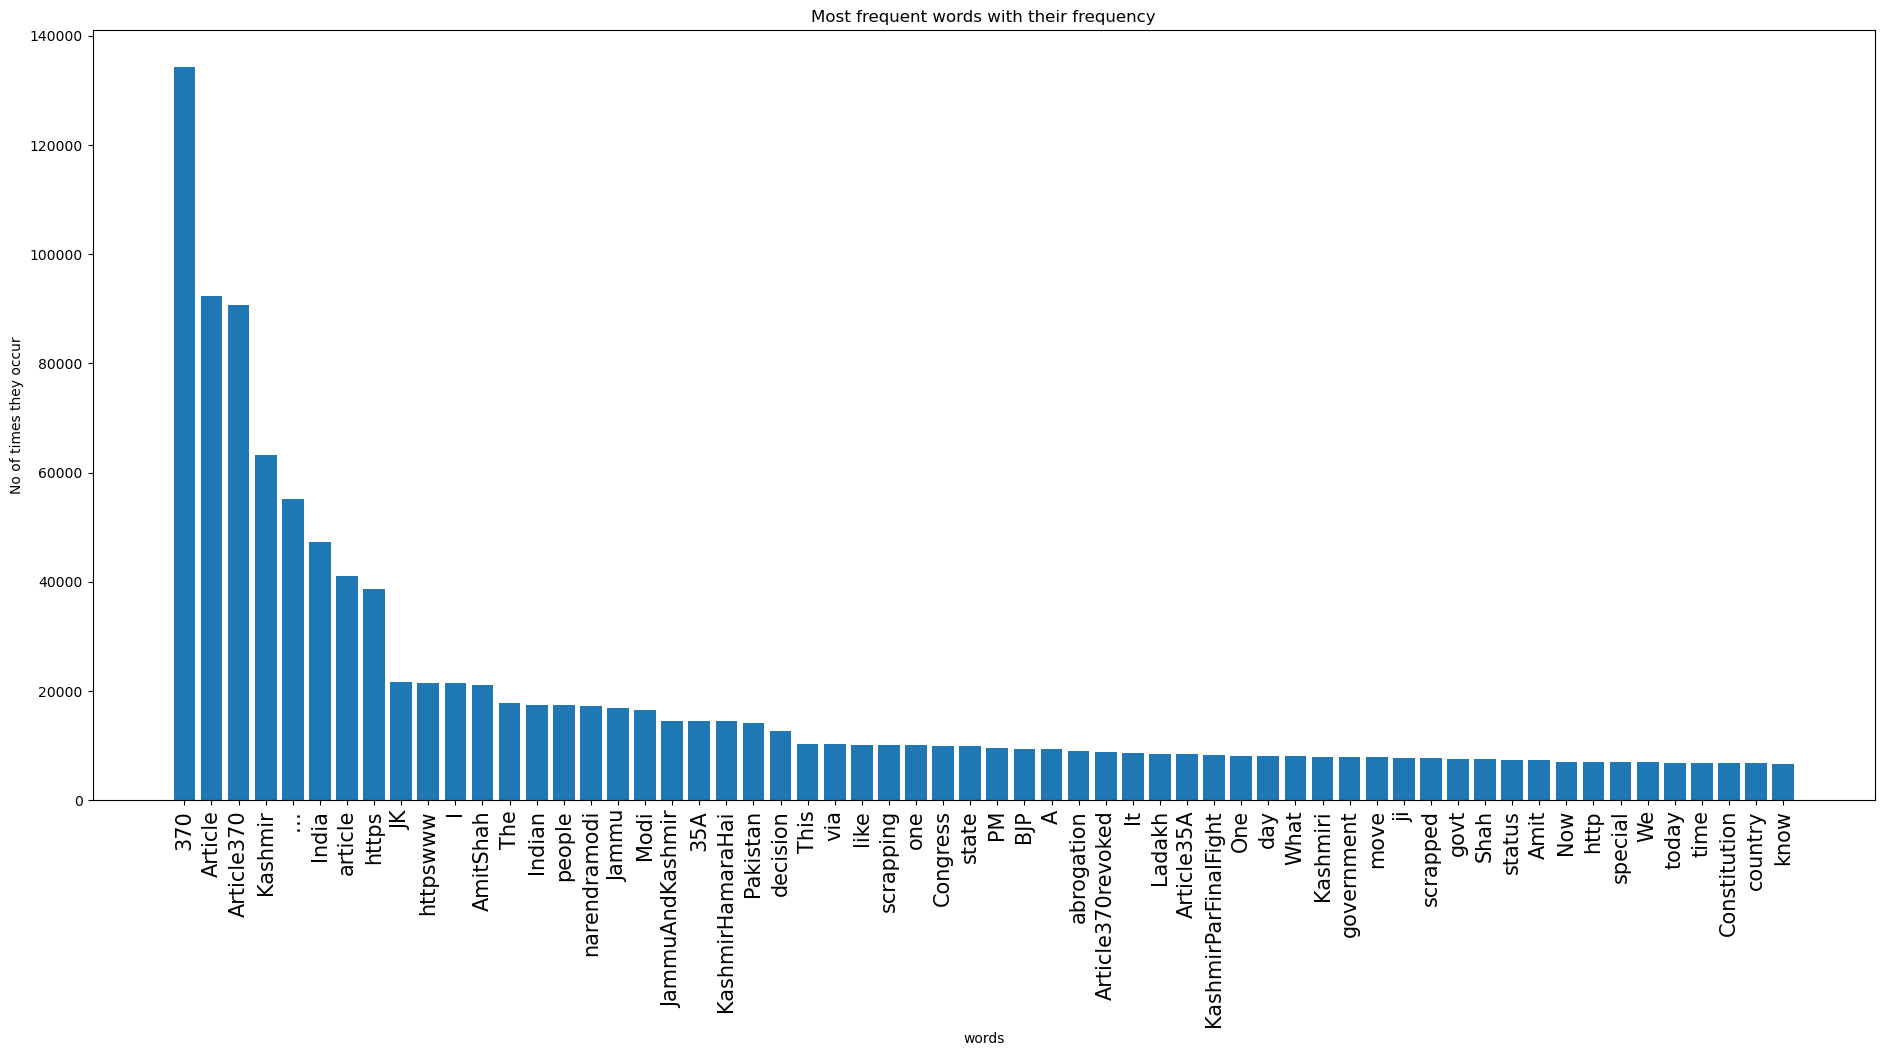

In [50]:
index = np.arange(len(freqwords))
plt.figure(figsize=(23, 10))
plt.bar(index, freq)
plt.xlabel('words', fontsize=10)
plt.ylabel('No of times they occur', fontsize=10)
plt.xticks(index, w, fontsize=15, rotation=90)
plt.title('Most frequent words with their frequency')
plt.show()
     

# **Sentiment Analysis**

In [70]:
from nltk import tokenize
import nltk
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [55]:
df.drop('usernameTweet',axis=1,inplace=True)

In [56]:
df.head(2)

,datetime,is_retweet,text,hour,date,minute,day,text_len
0,2019-08-10 13:00:38,False,KashmirWithModi \nWith the scrapping of Arti...,13,2019-08-10,0,10,257
1,2019-08-10 11:19:03,False,Shocking Shameful A must read article for e...,11,2019-08-10,19,10,241


In [85]:

# Download window opens, fetch wordnet
from nltk.corpus import wordnet as wn

In [67]:
porter = PorterStemmer()

lemmatizer = WordNetLemmatizer() 

In [68]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
import io
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS	
from collections import Counter
from PIL import Image
import numpy as np
import urllib
import requests

In [86]:
import nltk


In [77]:
nltk.download('all-corpora')

[nltk_data] Downloading collection 'all-corpora'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /usr/share/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /usr/share/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    

True

In [87]:
nltk.download('wordnet') 

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [93]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [95]:
# Lemmatize the Text
from nltk.stem import WordNetLemmatizer
df['text_lem'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) for line in lists]).strip() for lists in df['text']]
     

In [96]:
df.head()

,datetime,is_retweet,text,hour,date,minute,day,text_len,text_lem
0,2019-08-10 13:00:38,False,KashmirWithModi \nWith the scrapping of Arti...,13,2019-08-10,0,10,257,KashmirWithModi With the scrapping of Articl...
1,2019-08-10 11:19:03,False,Shocking Shameful A must read article for e...,11,2019-08-10,19,10,241,Shocking Shameful A must read article for e...
2,2019-08-14 01:30:24,False,What makes True Islam followers like you conf...,1,2019-08-14,30,14,263,What makes True Islam followers like you conf...
3,2019-08-16 00:21:09,False,Just sickening to read this thread I guess it ...,0,2019-08-16,21,16,268,Just sickening to read this thread I guess it ...
4,2019-08-11 20:31:43,False,Dont worry Pyari Behna whoever opposing or pro...,20,2019-08-11,31,11,175,Dont worry Pyari Behna whoever opposing or pro...


In [99]:
sid = SentimentIntensityAnalyzer()

df['sentiment_compound_polarity']=df.text_lem.apply(lambda x:sid.polarity_scores(x)['compound'])
df['sentiment_neutral']=df.text_lem.apply(lambda x:sid.polarity_scores(x)['neu'])
df['sentiment_negative']=df.text_lem.apply(lambda x:sid.polarity_scores(x)['neg'])
df['sentiment_pos']=df.text_lem.apply(lambda x:sid.polarity_scores(x)['pos'])
df['sentiment_type']=''
df.loc[df.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
df.loc[df.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
df.loc[df.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
df.head()

,datetime,is_retweet,text,hour,date,minute,day,text_len,text_lem,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
0,2019-08-10 13:00:38,False,KashmirWithModi \nWith the scrapping of Arti...,13,2019-08-10,0,10,257,KashmirWithModi With the scrapping of Articl...,0.5859,0.862,0.000,0.138,POSITIVE
1,2019-08-10 11:19:03,False,Shocking Shameful A must read article for e...,11,2019-08-10,19,10,241,Shocking Shameful A must read article for e...,-0.7269,0.603,0.268,0.129,NEGATIVE
2,2019-08-14 01:30:24,False,What makes True Islam followers like you conf...,1,2019-08-14,30,14,263,What makes True Islam followers like you conf...,0.6124,0.772,0.063,0.165,POSITIVE
3,2019-08-16 00:21:09,False,Just sickening to read this thread I guess it ...,0,2019-08-16,21,16,268,Just sickening to read this thread I guess it ...,-0.4895,0.868,0.102,0.030,NEGATIVE
4,2019-08-11 20:31:43,False,Dont worry Pyari Behna whoever opposing or pro...,20,2019-08-11,31,11,175,Dont worry Pyari Behna whoever opposing or pro...,-0.5106,0.740,0.183,0.077,NEGATIVE


In [100]:
import matplotlib
matplotlib.style.use('ggplot')

tweets_sentiment =df.groupby(['sentiment_type'])['sentiment_neutral'].count()
tweets_sentnt = df.groupby(['sentiment_type']).count()

In [101]:

tweets_sentiment

sentiment_type
NEGATIVE     57640
NEUTRAL      52184
POSITIVE    117435
Name: sentiment_neutral, dtype: int64

Text(0.5, 1.0, 'Sentiment Analysis 1')

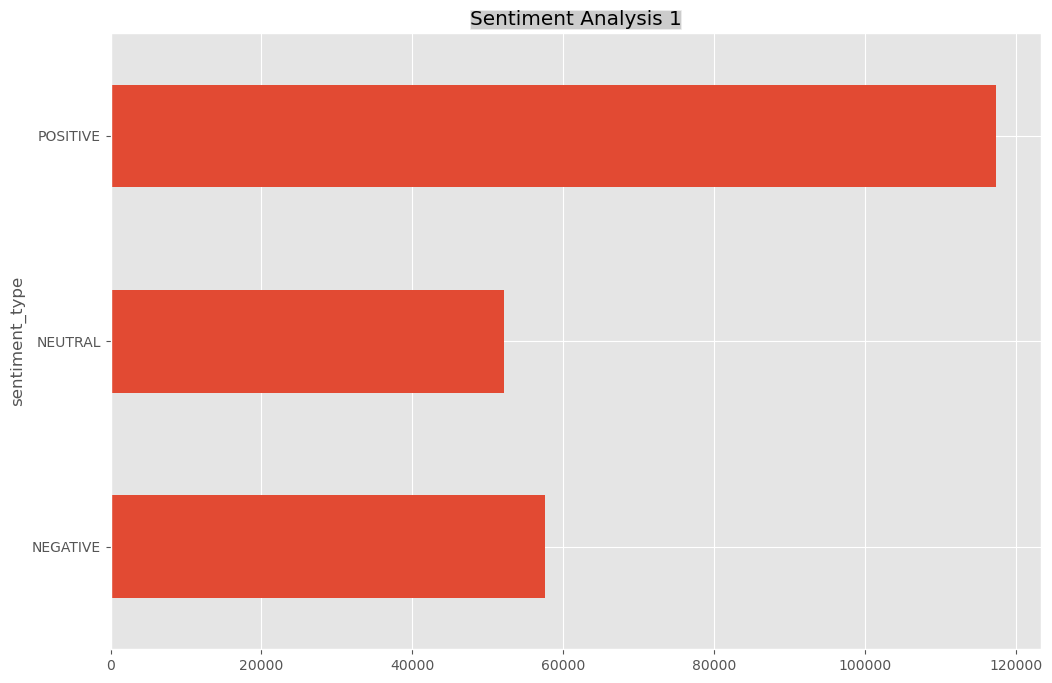

In [102]:
tweets_sentiment.rename("",inplace=True)
explode = (0, 0, 1.0)
# plt.subplot(221)
tweets_sentiment.transpose().plot(kind='barh',figsize=(12, 8))
plt.title('Sentiment Analysis 1', bbox={'facecolor':'0.8', 'pad':0})
# plt.subplot(222)

Text(0.5, 1.0, 'Sentiment Analysis 2')

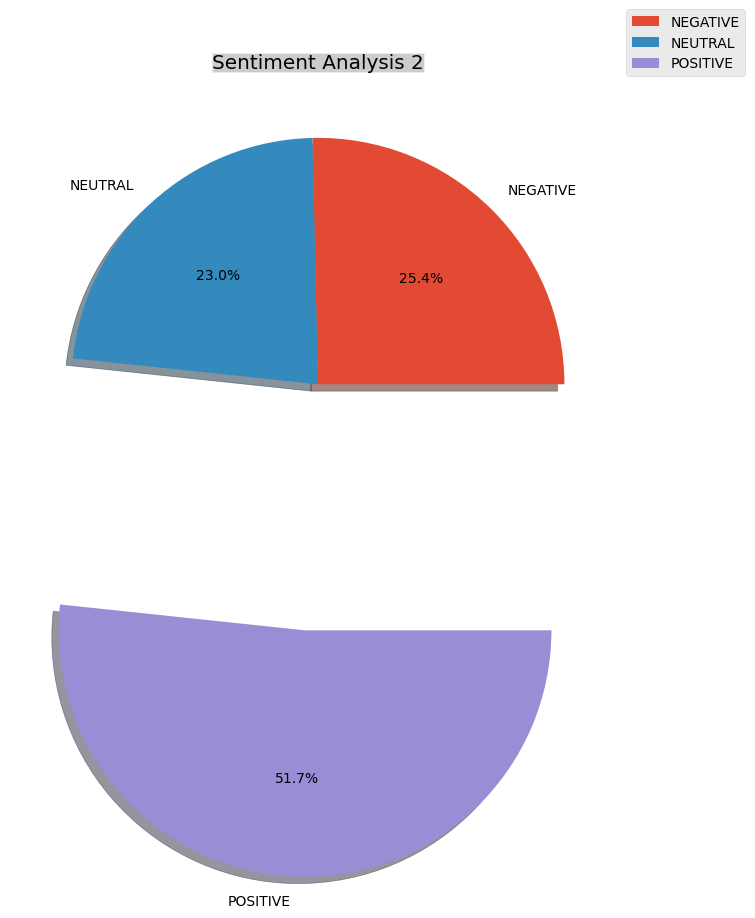

In [103]:
tweets_sentiment.plot(kind='pie',figsize=(12, 8),autopct='%1.1f%%',shadow=True,explode=explode)
plt.legend(bbox_to_anchor=(1, 1), loc=3, borderaxespad=0.)
plt.title('Sentiment Analysis 2', bbox={'facecolor':'0.8', 'pad':0})

In [104]:
df['count'] = 1
tweets_filtered = df[['hour', 'sentiment_type', 'count']]
pivot_tweets = tweets_filtered.pivot_table(tweets_filtered, index=["sentiment_type", "hour"], aggfunc=np.sum)
print(pivot_tweets.head())
     

                     count
sentiment_type hour       
NEGATIVE       0      1653
               1      1058
               2       712
               3       532
               4       425


Text(0.5, 1.0, 'Evolution of sentiments by hour')

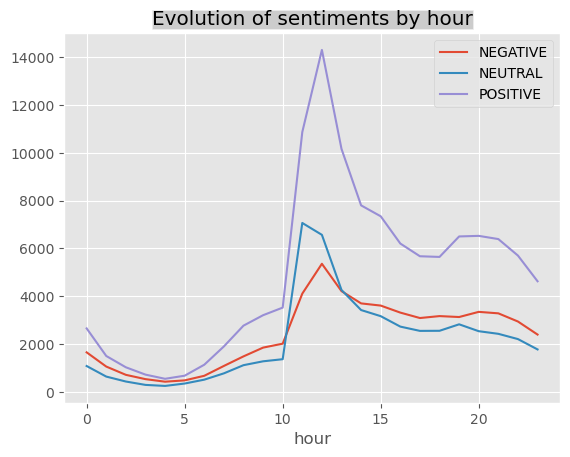

In [105]:
sentiment_type = pivot_tweets.index.get_level_values(0).unique()
# f, ax = plt.subplots(2, 1, figsize=(8, 10))
# plt.setp(ax, xticks=list(range(0,24)))

for sentiment_type in sentiment_type:
    split = pivot_tweets.xs(sentiment_type)
    split["count"].plot( legend=True, label='' + str(sentiment_type))
plt.title('Evolution of sentiments by hour', bbox={'facecolor':'0.8', 'pad':0}) 

In [ ]:
from textblob import TextBlob
     

tb1 = (" We are learning cool Library . We are enjoying a lot.")
x = TextBlob(tb1).sentiment.polarity
print(x)